# HackaTUM 2022
# ABIOGENESIS

This project was completed on November 18-20, 2022

Team Members:
...






In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from main import *

# Visualize the data

In [38]:
def plot_3d_scan(path):
    volume, x_vec, y_vec, z_vec = import_volume(
        path
    )
    n_layers = volume.shape[2]

    fig, ax = plt.subplots(n_layers // 5 + 1, figsize=(30,30))

    for i, layer_index in enumerate(range(0, n_layers, 5)):
    # print(volume.shape)
        img_2d = compute_slice(volume, layer_index)

        img_2d = np.abs(img_2d)
        ax[i].imshow(img_2d)
        ax[i].set_title(f'image layer {layer_index}')
        ax[i].legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

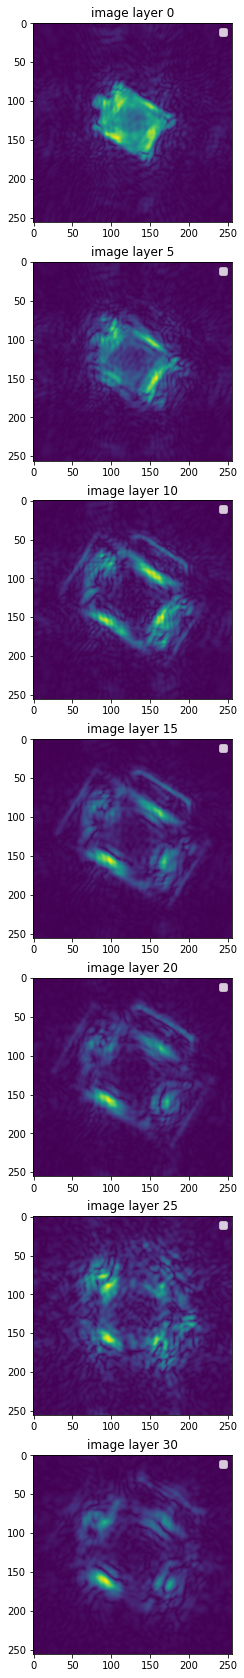

In [39]:
plot_3d_scan(r"../../volumes/example-1.img")

In [45]:
import pathlib

example_img_path = pathlib.Path('C:/Users/Алексей/Documents/Crypto/HackaTUM/microwave-imaging/team-3/20221119-114924-969/20221119-114924-969_reco.img')
example_volume, x_vec, y_vec, z_vec = import_volume(
    'C:/Users/Алексей/Documents/Crypto/HackaTUM/microwave-imaging/team-3/20221119-114924-969/20221119-114924-969_reco.img'
)

plot_3d_scan(
   example_volume
)


display(
        example_volume,
        img_title="Maximum intensity projection (MIP)",
        cmap_label="Normalized magnitude in dB",
        xvec=x_vec,
        yvec=y_vec,
        dynamic_range=30,
        xlabel="$x$ in m",
        ylabel="$y$ in m",
    )

TypeError: expected str, bytes or os.PathLike object, not ndarray

(256, 256, 32)
1 --> visualize magnitude of the MIP


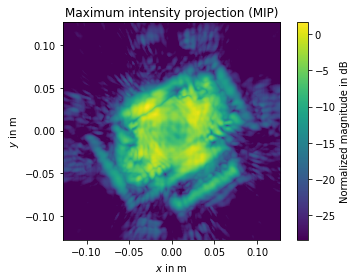

In [8]:
C0 = 299792458
FC = 77e9
LAMBDA = C0 / FC

Z_IDX = 13

volume, x_vec, y_vec, z_vec = import_volume(
    r"../../volumes/example-1.img"
)

print(volume.shape)

Nx = x_vec.size
Ny = y_vec.size

kx = (np.arange(-Nx / 2, Nx / 2 - 1)) / ((Nx - 1) * np.diff(x_vec[:2]))
ky = (np.arange(-Ny / 2, Ny / 2 - 1)) / ((Ny - 1) * np.diff(y_vec[:2]))

kx_n = kx * LAMBDA
ky_n = ky * LAMBDA

volume_max, kmax = compute_mip(volume)
volume_max_range = (np.min(np.abs(volume_max)), np.max(np.abs(volume_max)))
alpha_data = np.clip(
    1.8 * ((np.abs(volume_max) - volume_max_range[0]) / (volume_max_range[1] - volume_max_range[0])) - 0.25, 0, 1,
)

print('1 --> visualize magnitude of the MIP')
image = 20 * np.log10(np.abs(volume_max / np.max(volume_max)))
display(
    image,
    img_title="Maximum intensity projection (MIP)",
    cmap_label="Normalized magnitude in dB",
    xvec=x_vec,
    yvec=y_vec,
    dynamic_range=30,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)